In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def _plot(points):
    plt.scatter(points[:, 0], points[:, 1])

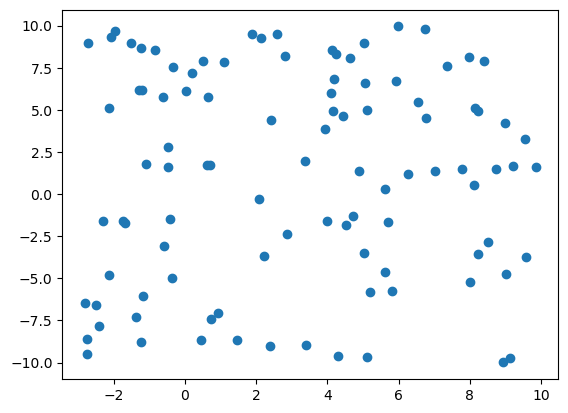

In [3]:
## Sample Point Cloud
np.random.seed(1)
points_xyz = np.random.rand(100, 3)
x_range = [-3, 10]
y_range = [-10, 10]
z_range = [-1, 1]

points_xyz[:, 0] *= (x_range[1] - x_range[0])
points_xyz[:, 0] += x_range[0]

points_xyz[:, 1] *= (y_range[1] - y_range[0])
points_xyz[:, 1] += y_range[0]

points_xyz[:, 2] *= (z_range[1] - z_range[0])
points_xyz[:, 2] += z_range[0]

_plot(points_xyz)

In [4]:
from graph_generation import multi_layer_downsampling_random, \
                            gen_disjointed_rnn_local_graph_v3,\
                            gen_multi_level_local_graph_v3

xyz_offset
[[-2.80475325 -9.9919595  -0.99977125]]
level_id 0
voxels_idx
{59: [0], 106: [1], 114: [2, 51], 124: [3, 31, 79], 74: [4], 125: [5], 105: [6, 9], 119: [7], 166: [8, 76, 93], 121: [10, 20, 82], 148: [11, 58, 96], 69: [12], 173: [13, 36], 154: [14, 45, 81], 163: [15], 10: [16], 109: [17], 100: [18], 137: [19], 99: [21, 98], 133: [22], 164: [23, 67, 69], 153: [24, 38, 74], 161: [25, 37], 149: [26], 156: [27, 42, 54, 77], 162: [28, 41, 80], 151: [29], 169: [30, 50, 72, 99], 54: [32], 116: [33], 126: [34], 92: [35, 44], 150: [39], 88: [40], 138: [43, 52, 62, 86], 158: [46, 87], 97: [47, 48, 71], 53: [49], 110: [53], 96: [55], 140: [56], 143: [57], 98: [59], 108: [60], 113: [61], 118: [63, 88], 157: [64], 94: [65, 83], 172: [66], 131: [68], 171: [70, 84, 91], 104: [73], 142: [75, 85], 52: [78], 123: [89], 115: [90], 122: [92], 117: [94], 134: [95], 141: [97]}
level_id 2
voxels_idx
{18: [0, 10, 11, 25], 5: [1, 2, 6, 15, 19, 37, 43], 10: [3, 5, 30, 55, 58], 21: [4, 23], 11: [7, 31, 

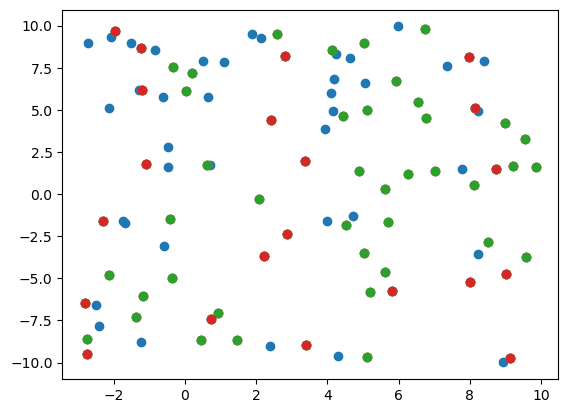

In [5]:
np.random.seed(4)

## Settings
base_voxel_size = 2
level_config_scales = [1, 1, 2]

output = multi_layer_downsampling_random(points_xyz, base_voxel_size, level_config_scales, add_rnd3d=True)
# print("output")
# print(output)

zero_offset = np.array([[-2.80475325, -9.9919595,  -0.99977125]])
random_offset = base_voxel_size*np.random.random((1,3))

# # _plot((output[0][0] - zero_offset + random_offset)//base_voxel_size)
# _plot((output[0][0] - zero_offset + random_offset))
# _plot((output[0][0] - zero_offset))

# print(len(output[0]))
_plot(output[0][0])
_plot(output[0][1])
_plot(output[0][2])
_plot(output[0][3])

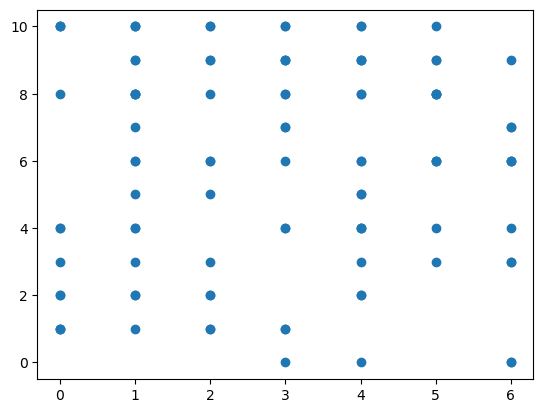

In [6]:
zero_offset = np.array([[-2.80475325, -9.9919595,  -0.99977125]])
random_offset = base_voxel_size*np.random.random((1,3))
# _plot((output[0][0] - zero_offset)//base_voxel_size)
_plot((output[0][0] - zero_offset + random_offset)//base_voxel_size)
# _plot((output[0][0] - zero_offset))

In [7]:
edges_output = gen_disjointed_rnn_local_graph_v3(output[0][-2], output[0][-1], 5, num_neighbors=10)

print(edges_output)

indices
[array([50, 41, 35, 26, 25, 24, 22, 21, 18, 14, 13, 47, 11, 10,  0, 54,  4],
       dtype=int64)
 array([ 1,  2, 40, 37,  6, 43, 19, 44, 52, 17, 45, 15, 34, 56],
       dtype=int64)
 array([16,  2, 44, 58, 56, 30, 55,  3,  5, 57, 50, 20, 38, 41, 35, 54],
       dtype=int64)
 array([23, 26, 22, 14, 13, 51,  4, 28], dtype=int64)
 array([16, 39, 44, 48, 46, 58,  7, 30, 31,  5], dtype=int64)
 array([36, 25, 24, 21, 47, 12, 49, 11, 10,  8, 33], dtype=int64)
 array([ 2,  6, 52, 45, 56,  9, 57, 50, 35, 18], dtype=int64)
 array([35, 23, 26, 22, 18, 14, 13,  0,  4, 28], dtype=int64)
 array([23, 26, 25, 22, 21, 14, 13, 47, 12, 49, 11, 51, 10,  0,  4],
       dtype=int64)
 array([16, 39, 44, 17, 46, 32, 58,  7, 56, 30, 31, 55,  3,  5],
       dtype=int64)
 array([16,  1, 43, 19, 44, 17, 15, 32, 58], dtype=int64)
 array([ 9, 57, 50, 35, 22, 18, 13,  0, 54], dtype=int64)
 array([55,  3,  5, 50, 20, 38, 41, 60, 35, 25, 24, 18, 10,  0, 54],
       dtype=int64)
 array([59, 38, 60, 27, 36, 25, 